# Genotypes of the founders

## Simulated founders

In [7]:
import numpy as np
import random as rd
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
SMALL_SIZE = 7
MEDIUM_SIZE = 15
BIGGER_SIZE = 20

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

In [9]:
n = 16    # founders
p = 1000  # nb of SNPs

In [10]:
F_haplo = np.array([[j for i in range(p)] for j in range(1,n+1)])    # founders' haplotypes (n founders and p SNPs)
F_geno = np.array([[rd.randint(0,1) for snp in range(p)] for founder in range (n)])    # founders' genotypes

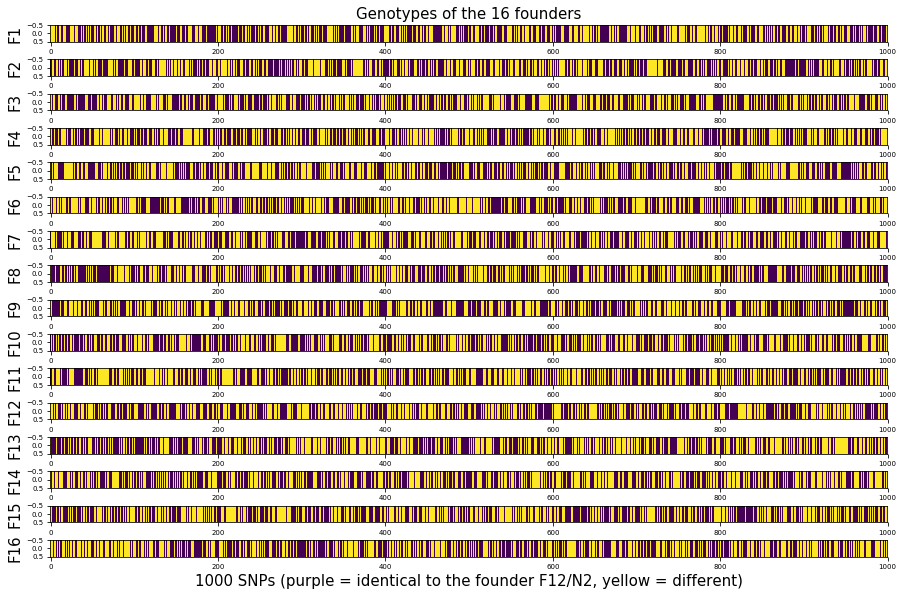

In [11]:
im, ax = plt.subplots(16,1, figsize = (15,10))
ax[0].set(title = "Genotypes of the 16 founders")
for k in range (16):
    ax[k].imshow (np.expand_dims(F_geno[k],1).T, aspect = 20)
    ax[k].set(ylabel = "F{}".format(k+1))
ax[15].set(xlabel = "1000 SNPs (purple = identical to the founder F12/N2, yellow = different)")
plt.show()

## Real founders

### Full chromosome I

In [12]:
import numpy as np
import random as rd
import pandas as pd
import matplotlib.pyplot as plt
import pickle
from pprint import pprint
%matplotlib inline

In [13]:
SMALL_SIZE = 7
MEDIUM_SIZE = 15
BIGGER_SIZE = 20

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

**Import genetic data** (linkage) as a dataframe.

In [14]:
geneticDF = pd.read_csv("./Donnees_supplementaires/WS220.founder.bsqr.calls.genetic.txt", delimiter="\t")
pprint(geneticDF[:10])

          chrom   pos ref alt  genetic
0  CHROMOSOME_I   855   G   C      0.0
1  CHROMOSOME_I  1222   A   C      0.0
2  CHROMOSOME_I  1291   G   T      0.0
3  CHROMOSOME_I  1713   T   G      0.0
4  CHROMOSOME_I  1761   G   A      0.0
5  CHROMOSOME_I  1799   T   C      0.0
6  CHROMOSOME_I  1902   C   G      0.0
7  CHROMOSOME_I  1933   C   G      0.0
8  CHROMOSOME_I  2618   T   A      0.0
9  CHROMOSOME_I  2622   T   A      0.0


In [15]:
geneticDF.groupby('chrom').describe()

pos                                                   \
                   count          mean           std      min         25%   
chrom                                                                       
CHROMOSOME_I     39817.0  7.173954e+06  5.174639e+06    855.0  2155394.00   
CHROMOSOME_II    81373.0  6.429576e+06  4.941117e+06    943.0  2168585.00   
CHROMOSOME_III   60754.0  5.144998e+06  4.706639e+06    421.0  1159027.25   
CHROMOSOME_IV    57513.0  8.936451e+06  6.168507e+06  23876.0  2718280.00   
CHROMOSOME_V    115968.0  1.155985e+07  7.343576e+06    405.0  3409704.75   
CHROMOSOME_X     49111.0  9.626188e+06  5.073525e+06   5755.0  5214118.50   

                                                      genetic             \
                       50%          75%         max     count       mean   
chrom                                                                      
CHROMOSOME_I     6493036.0  12364998.00  15066925.0   39817.0  48.773637   
CHROMOSOME_II    3804273.0  12051766.00  15276886.0   81373.0  50.455178   
CHROMOSOME_III   2782780.5  10499259.50  13780879.0   60754.0  51.590025   
CHROMOSOME_IV    7456621.0  15264068.00  17492235.0   57513.0  95.357527   
CHROMOSOME_V    15663984.5  17708407.75  20922549.0  115968.0  70.660283   
CHROMOSOME_X    10096210.0  14227277.00  17718678.0   49111.0  58.430795   

                                                                              
                      std  min        25%        50%         75%         max  
chrom                                                                         
CHROMOSOME_I    38.214724  0.0  15.687636  39.105580   78.113818  135.188818  
CHROMOSOME_II   41.415471  0.0   8.760064  41.289589   78.947269  133.279335  
CHROMOSOME_III  45.831267  0.0   6.814036  44.096847   88.564221  137.416947  
CHROMOSOME_IV   47.581686  0.0  60.528837  97.634283  134.684918  156.272742  
CHROMOSOME_V    48.466181  0.0  19.893801  85.054047  100.005535  146.854729  
CHROMOSOME_X    32.393336  0.0  34.910665  57.306995   87.033258  107.845644

***Keep only the chromosome 1 and rescale genetic distance between 0 and 50***

In [16]:
geneticDF_ch1 = geneticDF[geneticDF.chrom == "CHROMOSOME_I"]

pd.options.mode.chained_assignment = None
s = 50/max(geneticDF_ch1.genetic)
geneticDF_ch1["genetic_scaled"] = [s*g for g in geneticDF_ch1.genetic]
geneticDF_ch1.describe()

,pos,genetic,genetic_scaled
count,3.981700e+04,39817.000000,39817.000000
mean,7.173954e+06,48.773637,18.039080
std,5.174639e+06,38.214724,14.133833
min,8.550000e+02,0.000000,0.000000
25%,2.155394e+06,15.687636,5.802120
50%,6.493036e+06,39.105580,14.463319
75%,1.236500e+07,78.113818,28.890636
max,1.506692e+07,135.188818,50.000000


`linkage` = vector of the recombination probabilities.

In [17]:
linkage = np.diff(geneticDF_ch1.genetic_scaled)
linkage/=sum(linkage)
linkage = np.append([0], linkage)
display(linkage,linkage.shape,max(linkage),sum(linkage))

array([0., 0., 0., ..., 0., 0., 0.])

(39817,)

0.001703967582336503

0.999999999999998

In [18]:
with open("Linkage_p{}.pkl".format(linkage.shape[0]),"wb") as handler:
    pickle.dump(linkage, handler)

***Plot smoothened linkage***

In [19]:
linkage_smooth = []
pos_smooth = []
l = 2000000
m=max(geneticDF_ch1.pos)
points=1000
for k in range (l//2,m-l//2,m//points):
    window=np.logical_and(k-l//2<geneticDF_ch1.pos,geneticDF_ch1.pos<k+l//2)
    linkage_smooth.append(np.mean(linkage[window]))
    pos_smooth.append(np.median(geneticDF_ch1.pos[window]))

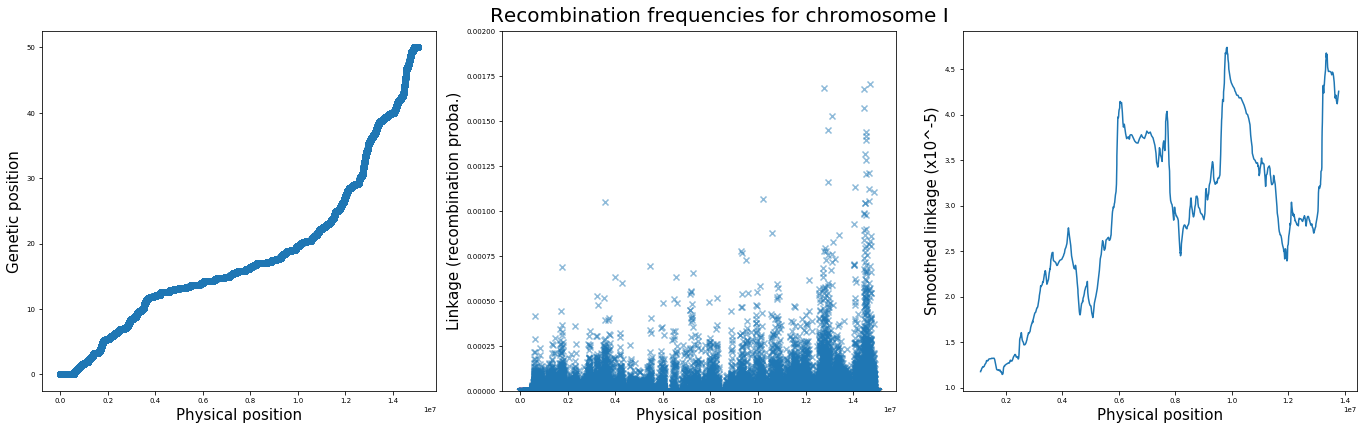

In [20]:
fig, (ax1, ax2, ax3) = plt.subplots (1,3, figsize = (20, 6))
fig.suptitle("Recombination frequencies for chromosome I")
ax1.scatter(geneticDF_ch1.pos, geneticDF_ch1.genetic_scaled)
ax1.set(xlabel = "Physical position", ylabel = "Genetic position")
ax2.scatter(geneticDF_ch1.pos, linkage, alpha=0.5, marker="x")
ax2.set(xlabel = "Physical position", ylabel = "Linkage (recombination proba.)", ylim = (0,0.002))
ax3.plot(pos_smooth, [l*10**5 for l in linkage_smooth])
ax3.set(xlabel = "Physical position", ylabel = "Smoothed linkage (x10^-5)")
plt.tight_layout(rect = [0, 0, 0.95, 0.95])

***Import SNPs*** = Single Nucleotide Polymorphisms

In [21]:
callsF3DF = pd.read_csv("./Donnees_supplementaires/WS220.founder.bsqr.calls.F3.clean", delimiter="\t")
pprint(callsF3DF[:10])

          chrom   pos ref alt   af.all  dp.all     qual  BaseQRankSum     MQ  \
0  CHROMOSOME_I   855   G   C  0.56250     572  8238.09        -8.252  51.46   
1  CHROMOSOME_I  1222   A   C  0.06250     431  2795.82       -11.496  59.94   
2  CHROMOSOME_I  1291   G   T  0.06250     504  1119.76        -3.182  58.29   
3  CHROMOSOME_I  1713   T   G  0.06250     455  1399.71        -9.725  57.38   
4  CHROMOSOME_I  1761   G   A  0.43750     533  5726.51        -3.884  59.51   
5  CHROMOSOME_I  1799   T   C  0.50000     520  6086.45        -0.706  56.92   
6  CHROMOSOME_I  1902   C   G  0.06250     484  1640.71        -1.861  56.47   
7  CHROMOSOME_I  1933   C   G  0.56250     517  9933.72        -8.107  56.64   
8  CHROMOSOME_I  2618   T   A  0.46875     302  3161.96        -0.213  51.89   
9  CHROMOSOME_I  2622   T   A  0.06250     319  1159.77        -8.278  52.18   

       FS  ...  JU319  JU345  JU400  MY1  MY16  N2.ANC  PB306  PX174  PX179  \
0   2.559  ...    1.0    1.0    0.0  0.0

In [22]:
callsF3DF.groupby('chrom').describe()

pos                                                   \
                   count          mean           std      min         25%   
chrom                                                                       
CHROMOSOME_I     39817.0  7.173954e+06  5.174639e+06    855.0  2155394.00   
CHROMOSOME_II    81373.0  6.429576e+06  4.941117e+06    943.0  2168585.00   
CHROMOSOME_III   60754.0  5.144998e+06  4.706639e+06    421.0  1159027.25   
CHROMOSOME_IV    57513.0  8.936451e+06  6.168507e+06  23876.0  2718280.00   
CHROMOSOME_V    115968.0  1.155985e+07  7.343576e+06    405.0  3409704.75   
CHROMOSOME_X     49111.0  9.626188e+06  5.073525e+06   5755.0  5214118.50   

                                                       af.all            ...  \
                       50%          75%         max     count      mean  ...   
chrom                                                                    ...   
CHROMOSOME_I     6493036.0  12364998.00  15066925.0   39817.0  0.198232  ...   
CHROMOSOME_II    3804273.0  12051766.00  15276886.0   81373.0  0.264841  ...   
CHROMOSOME_III   2782780.5  10499259.50  13780879.0   60754.0  0.231472  ...   
CHROMOSOME_IV    7456621.0  15264068.00  17492235.0   57513.0  0.126569  ...   
CHROMOSOME_V    15663984.5  17708407.75  20922549.0  115968.0  0.136982  ...   
CHROMOSOME_X    10096210.0  14227277.00  17718678.0   49111.0  0.211154  ...   

               PX179          RC301                                          \
                 75%  max     count      mean       std  min  25%  50%  75%   
chrom                                                                         
CHROMOSOME_I     0.0  1.0   39817.0  0.161614  0.365052  0.0  0.0  0.0  0.0   
CHROMOSOME_II    0.0  1.0   81373.0  0.393527  0.483271  0.0  0.0  0.0  1.0   
CHROMOSOME_III   0.0  1.0   60754.0  0.356042  0.474368  0.0  0.0  0.0  1.0   
CHROMOSOME_IV    0.0  1.0   57513.0  0.005355  0.064915  0.0  0.0  0.0  0.0   
CHROMOSOME_V     0.0  1.0  115968.0  0.040830  0.194536  0.0  0.0  0.0  0.0   
CHROMOSOME_X     0.0  1.0   49111.0  0.208874  0.405053  0.0  0.0  0.0  0.0   

                     
                max  
chrom                
CHROMOSOME_I    1.0  
CHROMOSOME_II   1.0  
CHROMOSOME_III  1.0  
CHROMOSOME_IV   1.0  
CHROMOSOME_V    1.0  
CHROMOSOME_X    1.0  

[6 rows x 248 columns]

***The 16 founders***

In [23]:
print(list(callsF3DF.columns[18:]))

['AB1', 'CB4507', 'CB4852', 'CB4855', 'CB4856', 'CB4858', 'JU319', 'JU345', 'JU400', 'MY1', 'MY16', 'N2.ANC', 'PB306', 'PX174', 'PX179', 'RC301']


***Deleting all 0.5 SNP data and extracting only positions and SNPs for the 16 founders*** : loss of 7% of the SNPs.

In [24]:
founders = callsF3DF[['chrom','pos']+list(callsF3DF.columns[18:])][callsF3DF[['chrom','pos']+list(callsF3DF.columns[18:])]!=0.5].dropna(how='any')
len(callsF3DF),len(founders),(len(callsF3DF)-len(founders))/len(callsF3DF)

(404536, 376143, 0.0701865841358989)

***Convert floats into integers***

In [25]:
founders[list(founders.columns[2:])] = founders[list(founders.columns[2:])].astype(int)

In [26]:
founders[:5]

,chrom,pos,AB1,CB4507,CB4852,CB4855,CB4856,CB4858,JU319,JU345,JU400,MY1,MY16,N2.ANC,PB306,PX174,PX179,RC301
0,CHROMOSOME_I,855,0,0,0,1,1,1,1,1,0,0,1,0,1,1,0,1
1,CHROMOSOME_I,1222,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,CHROMOSOME_I,1291,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,CHROMOSOME_I,1713,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,CHROMOSOME_I,1761,0,0,0,1,0,1,1,1,0,0,0,0,1,1,0,1


In [27]:
founders.groupby('chrom').describe()

pos                                                  \
                   count          mean           std      min        25%   
chrom                                                                      
CHROMOSOME_I     37525.0  7.218341e+06  5.158361e+06    855.0  2183005.0   
CHROMOSOME_II    72349.0  6.681606e+06  4.958754e+06    943.0  2256953.0   
CHROMOSOME_III   55544.0  5.245251e+06  4.704111e+06    421.0  1213428.5   
CHROMOSOME_IV    55174.0  8.960969e+06  6.147024e+06  23876.0  2745629.5   
CHROMOSOME_V    107887.0  1.136630e+07  7.311525e+06    405.0  3346520.5   
CHROMOSOME_X     47664.0  9.602687e+06  5.077594e+06   5755.0  5178930.0   

                                                          AB1            ...  \
                       50%          75%         max     count      mean  ...   
chrom                                                                    ...   
CHROMOSOME_I     7098199.0  12356193.00  15066925.0   37525.0  0.140493  ...   
CHROMOSOME_II    4148900.0  12162585.00  15276886.0   72349.0  0.150645  ...   
CHROMOSOME_III   2891256.0  10549759.50  13780879.0   55544.0  0.211310  ...   
CHROMOSOME_IV    7467548.5  15246185.75  17492235.0   55174.0  0.177529  ...   
CHROMOSOME_V    15112815.0  17526757.00  20922549.0  107887.0  0.138367  ...   
CHROMOSOME_X    10091223.5  14221393.00  17718678.0   47664.0  0.185885  ...   

               PX179          RC301                                          \
                 75%  max     count      mean       std  min  25%  50%  75%   
chrom                                                                         
CHROMOSOME_I     0.0  1.0   37525.0  0.154244  0.361187  0.0  0.0  0.0  0.0   
CHROMOSOME_II    0.0  1.0   72349.0  0.379729  0.485323  0.0  0.0  0.0  1.0   
CHROMOSOME_III   0.0  1.0   55544.0  0.351397  0.477411  0.0  0.0  0.0  1.0   
CHROMOSOME_IV    0.0  1.0   55174.0  0.003208  0.056549  0.0  0.0  0.0  0.0   
CHROMOSOME_V     0.0  1.0  107887.0  0.036603  0.187786  0.0  0.0  0.0  0.0   
CHROMOSOME_X     0.0  1.0   47664.0  0.204032  0.402997  0.0  0.0  0.0  0.0   

                     
                max  
chrom                
CHROMOSOME_I    1.0  
CHROMOSOME_II   1.0  
CHROMOSOME_III  1.0  
CHROMOSOME_IV   1.0  
CHROMOSOME_V    1.0  
CHROMOSOME_X    1.0  

[6 rows x 136 columns]

***Deleting the same SNPs in genetic data and recalculate linkage***

`linkage` = vector of the recombination probabilities.

In [28]:
founders_pos_ch1 = founders.pos[founders.chrom == 'CHROMOSOME_I'].values
geneticDF_ch1_reduced = geneticDF_ch1[[p in founders_pos_ch1 for p in geneticDF_ch1.pos]]
geneticDF_ch1_reduced.shape

(37525, 6)

In [29]:
linkage = np.diff(geneticDF_ch1_reduced.genetic_scaled)
linkage/=sum(linkage)
linkage = np.append([0], linkage)
display(linkage,linkage.shape,max(linkage),sum(linkage))

array([0., 0., 0., ..., 0., 0., 0.])

(37525,)

0.0020163750209577815

0.999999999999998

In [30]:
with open("Linkage_p{}.pkl".format(linkage.shape[0]),"wb") as handler:
    pickle.dump(linkage, handler)

In [31]:
linkage_smooth = []
pos_smooth = []
l = 2000000
m=max(geneticDF_ch1_reduced.pos)
points=1000
for k in range (l//2,m-l//2,m//points):
    window=np.logical_and(k-l//2<geneticDF_ch1_reduced.pos,geneticDF_ch1_reduced.pos<k+l//2)
    linkage_smooth.append(np.mean(linkage[window]))
    pos_smooth.append(np.median(geneticDF_ch1_reduced.pos[window]))

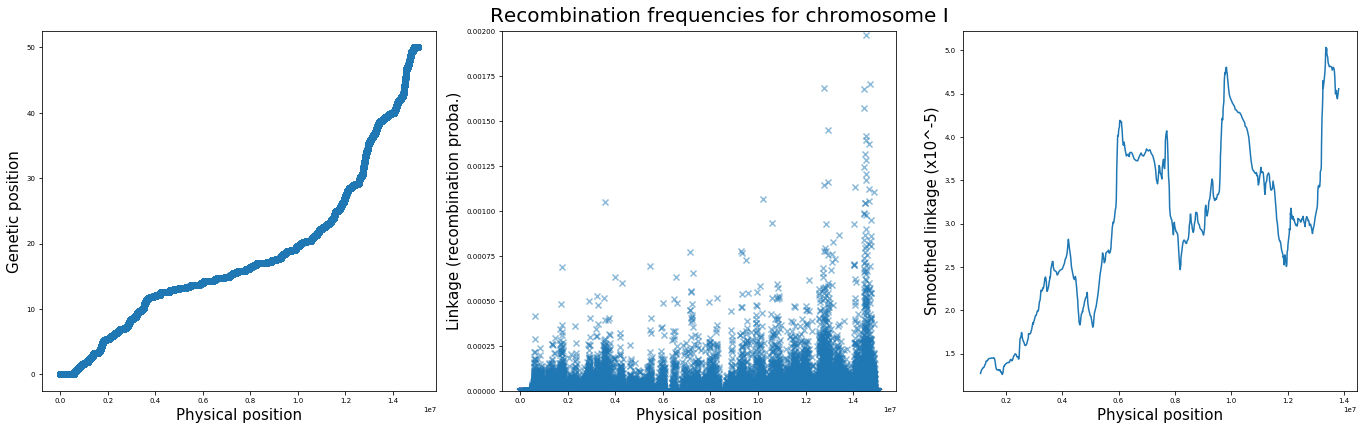

In [32]:
fig, (ax1, ax2, ax3) = plt.subplots (1,3, figsize = (20, 6))
fig.suptitle("Recombination frequencies for chromosome I")
ax1.scatter(geneticDF_ch1_reduced.pos, geneticDF_ch1_reduced.genetic_scaled)
ax1.set(xlabel = "Physical position", ylabel = "Genetic position")
ax2.scatter(geneticDF_ch1_reduced.pos, linkage,alpha=0.5,marker="x")
ax2.set(xlabel = "Physical position", ylabel = "Linkage (recombination proba.)", ylim = (0,0.002))
ax3.plot(pos_smooth, [l*10**5 for l in linkage_smooth])
ax3.set(xlabel = "Physical position", ylabel = "Smoothed linkage (x10^-5)")
plt.tight_layout(rect = [0, 0, 0.95, 0.95])
plt.show()

$\to$ Same results as previously.

***Extract chromosome I***

In [33]:
founders[founders.chrom=='CHROMOSOME_I'][:5]

,chrom,pos,AB1,CB4507,CB4852,CB4855,CB4856,CB4858,JU319,JU345,JU400,MY1,MY16,N2.ANC,PB306,PX174,PX179,RC301
0,CHROMOSOME_I,855,0,0,0,1,1,1,1,1,0,0,1,0,1,1,0,1
1,CHROMOSOME_I,1222,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,CHROMOSOME_I,1291,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,CHROMOSOME_I,1713,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,CHROMOSOME_I,1761,0,0,0,1,0,1,1,1,0,0,0,0,1,1,0,1


In [34]:
founders_ch1 = founders[founders.chrom=='CHROMOSOME_I'].values[:,2:]
np.shape(founders_ch1)

(37525, 16)

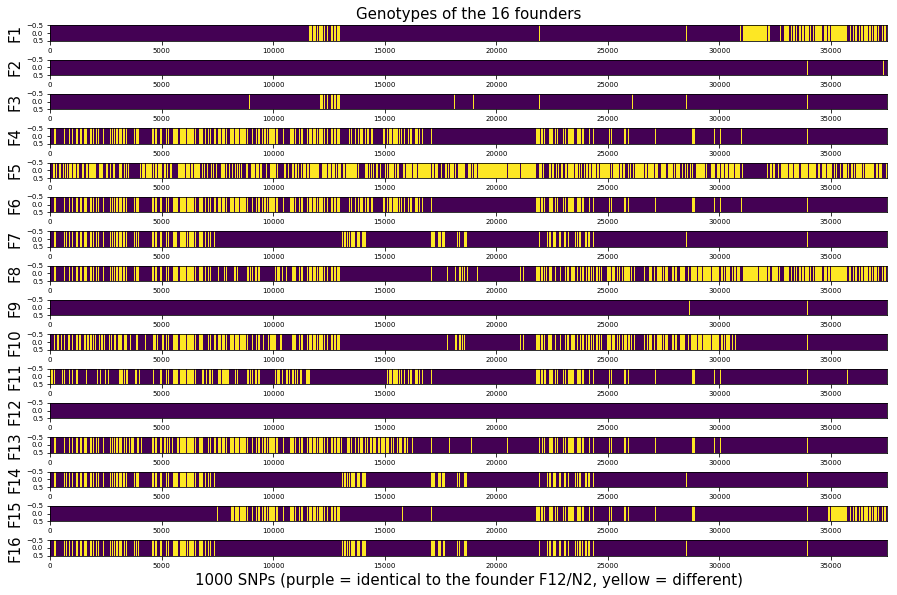

In [35]:
im, ax = plt.subplots(16,1, figsize = (15,10))
ax[0].set(title = "Genotypes of the 16 founders")
for k in range (16):
    ax[k].imshow (np.expand_dims(founders_ch1.T.astype(int)[k],1).T, aspect = 700)
    ax[k].set(ylabel = "F{}".format(k+1))
ax[15].set(xlabel = "{} SNPs (purple = identical to the founder F12/N2, yellow = different)".format(p))
plt.show()

### 1015 SNPs from ch. I

In [36]:
import numpy as np
from numpy.random import choice
import random as rd
import pandas as pd
import matplotlib.pyplot as plt
import copy 
import pickle
from pprint import pprint
%matplotlib inline

In [37]:
SMALL_SIZE = 7
MEDIUM_SIZE = 15
BIGGER_SIZE = 20

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

**Import genetic data** (linkage) as a dataframe.

In [38]:
geneticDF = pd.read_csv("./Donnees_supplementaires/WS220.founder.bsqr.calls.genetic.txt", delimiter="\t")
pprint(geneticDF[:10])

          chrom   pos ref alt  genetic
0  CHROMOSOME_I   855   G   C      0.0
1  CHROMOSOME_I  1222   A   C      0.0
2  CHROMOSOME_I  1291   G   T      0.0
3  CHROMOSOME_I  1713   T   G      0.0
4  CHROMOSOME_I  1761   G   A      0.0
5  CHROMOSOME_I  1799   T   C      0.0
6  CHROMOSOME_I  1902   C   G      0.0
7  CHROMOSOME_I  1933   C   G      0.0
8  CHROMOSOME_I  2618   T   A      0.0
9  CHROMOSOME_I  2622   T   A      0.0


Keep only the chromosome 1 and rescale genetic distance between 0 and 50.

In [39]:
geneticDF_ch1 = geneticDF[geneticDF.chrom == "CHROMOSOME_I"]

pd.options.mode.chained_assignment = None
s = 50/max(geneticDF_ch1.genetic)
geneticDF_ch1["genetic_scaled"] = [s*g for g in geneticDF_ch1.genetic]

In [40]:
callsF3DF = pd.read_csv("./Donnees_supplementaires/WS220.founder.bsqr.calls.F3.clean", delimiter="\t")

***The 16 founders***

In [41]:
print(list(callsF3DF.columns[18:]))

['AB1', 'CB4507', 'CB4852', 'CB4855', 'CB4856', 'CB4858', 'JU319', 'JU345', 'JU400', 'MY1', 'MY16', 'N2.ANC', 'PB306', 'PX174', 'PX179', 'RC301']


***Deleting all 0.5 SNP data and extracting only positions and SNPs for the 16 founders*** : loss of 7% of the SNPs.

In [42]:
founders = callsF3DF[['chrom','pos']+list(callsF3DF.columns[18:])][callsF3DF[['chrom','pos']+list(callsF3DF.columns[18:])]!=0.5].dropna(how='any')
len(callsF3DF),len(founders),(len(callsF3DF)-len(founders))/len(callsF3DF)

(404536, 376143, 0.0701865841358989)

***Convert floats into integers***

In [43]:
founders[list(founders.columns[2:])] = founders[list(founders.columns[2:])].astype(int)

***Deleting the same SNPs in genetic data and recalculate linkage***

`linkage` = vector of the recombination probabilities.

In [44]:
A = np.arange(37525)
founders_pos_ch1_1015 = founders.pos[founders.chrom == 'CHROMOSOME_I'][A//37==A/37].values
geneticDF_ch1_reduced_1015 = geneticDF_ch1[[p in founders_pos_ch1_1015 for p in geneticDF_ch1.pos]]
geneticDF_ch1_reduced_1015.shape

(1015, 6)

In [45]:
linkage = np.diff(geneticDF_ch1_reduced_1015.genetic_scaled)
linkage/=sum(linkage)
linkage = np.append([0], linkage)
display(linkage,linkage.shape,max(linkage),sum(linkage))

array([0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 6.9132966e-11,
       7.1160855e-12, 0.0000000e+00])

(1015,)

0.014377850379652984

0.9999999999999996

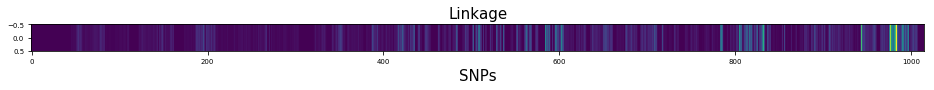

In [46]:
im, ax = plt.subplots (1,1, figsize = (16,3))
ax.imshow(np.expand_dims(linkage,0), aspect = 30)
ax.set (xlabel = "SNPs", title = "Linkage")
plt.show()

***Save a copy of the linkage***

In [47]:
with open("Linkage_p{}.pkl".format(linkage.shape[0]),"wb") as handler:
    pickle.dump(linkage, handler)

In [48]:
linkage_smooth = []
pos_smooth = []
l = 2000000
m=max(geneticDF_ch1_reduced_1015.pos)
points=100
for k in range (l//2,m-l//2,m//points):
    window=np.logical_and(k-l//2<geneticDF_ch1_reduced_1015.pos,geneticDF_ch1_reduced_1015.pos<k+l//2)
    linkage_smooth.append(np.mean(linkage[window]))
    pos_smooth.append(np.median(geneticDF_ch1_reduced_1015.pos[window]))

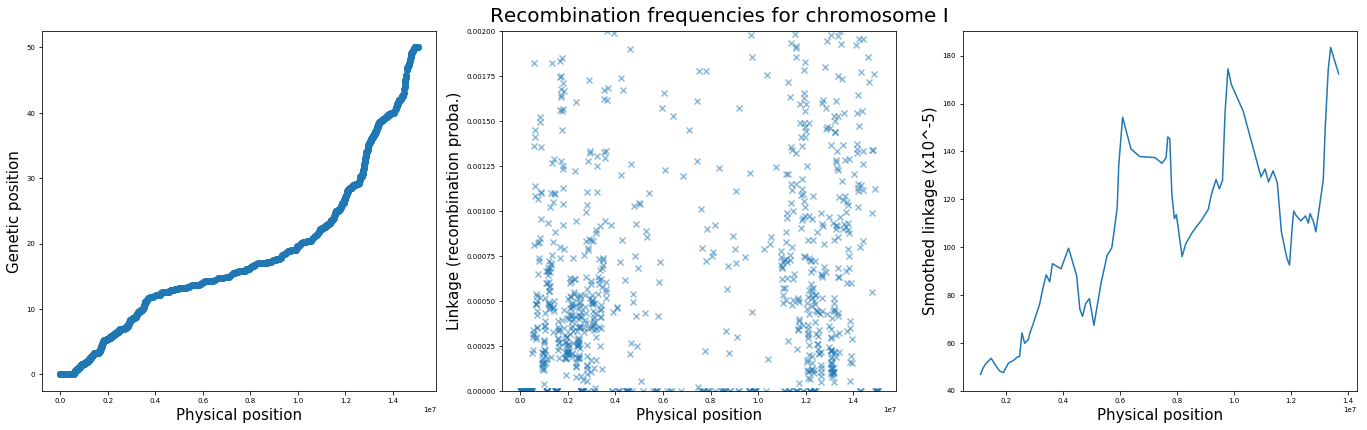

In [49]:
fig, (ax1, ax2, ax3) = plt.subplots (1,3, figsize = (20, 6))
fig.suptitle("Recombination frequencies for chromosome I")
ax1.scatter(geneticDF_ch1_reduced_1015.pos, geneticDF_ch1_reduced_1015.genetic_scaled)
ax1.set(xlabel = "Physical position", ylabel = "Genetic position")
ax2.scatter(geneticDF_ch1_reduced_1015.pos, linkage, alpha=0.5, marker="x")
ax2.set(xlabel = "Physical position", ylabel = "Linkage (recombination proba.)", ylim = (0,0.002))
ax3.plot(pos_smooth, [l*10**5 for l in linkage_smooth])
ax3.set(xlabel = "Physical position", ylabel = "Smoothed linkage (x10^-5)")
plt.tight_layout(rect = [0, 0, 0.95, 0.95])
plt.show()

$\to$ Same results as previously.

In [50]:
founders[founders.chrom=='CHROMOSOME_I'][:5]

,chrom,pos,AB1,CB4507,CB4852,CB4855,CB4856,CB4858,JU319,JU345,JU400,MY1,MY16,N2.ANC,PB306,PX174,PX179,RC301
0,CHROMOSOME_I,855,0,0,0,1,1,1,1,1,0,0,1,0,1,1,0,1
1,CHROMOSOME_I,1222,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,CHROMOSOME_I,1291,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,CHROMOSOME_I,1713,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,CHROMOSOME_I,1761,0,0,0,1,0,1,1,1,0,0,0,0,1,1,0,1


In [51]:
founders_ch1_1015 = founders[founders.chrom=='CHROMOSOME_I'][A//37==A/37].values[:,2:]
np.shape(founders_ch1_1015)

(1015, 16)

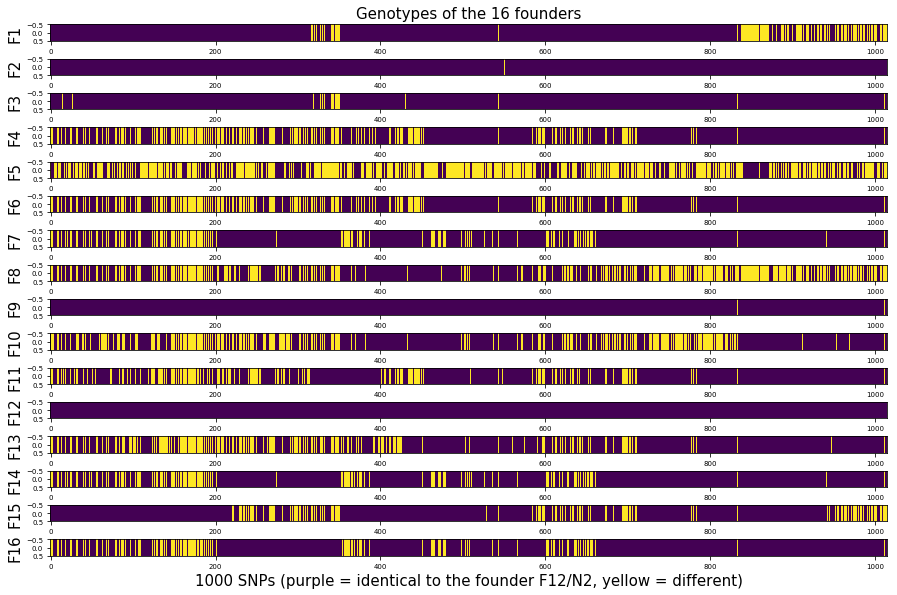

In [52]:
im, ax = plt.subplots(16,1, figsize = (15,10))
ax[0].set(title = "Genotypes of the 16 founders")
for k in range (16):
    ax[k].imshow (np.expand_dims(founders_ch1_1015.T.astype(int)[k],1).T, aspect = 20)
    ax[k].set(ylabel = "F{}".format(k+1))
ax[15].set(xlabel = "{} SNPs (purple = identical to the founder F12/N2, yellow = different)".format(p))
plt.show()

# Shuffle founders' genotypes

## Simulated founders

In [53]:
import numpy as np
from numpy.random import choice
import random as rd
import pandas as pd
import matplotlib.pyplot as plt
import copy 
import pickle
from pprint import pprint
import copy
%matplotlib inline

In [54]:
SMALL_SIZE = 7
MEDIUM_SIZE = 15
BIGGER_SIZE = 20

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

In [55]:
def recombine_linkage (parent_A,parent_B,linkage) :
    '''Recombines 2 parents' haplotypes at a random position chosen according to linkage'''
    r = choice(range(1,len(parent_A)),p=linkage)    # position of the recombination
    parent = rd.randint(0,1)
    child = np.copy([parent_A,parent_B][parent])
    child[r:] = [parent_A,parent_B][1-parent][r:]
    return child

def sample_parents (A) :
    '''Takes 2 parents among the individuals in a generation'''
    parent_A = rd.choice(A)
    parent_B = rd.choice(A)
    while (parent_B == parent_A).all() :
        parent_B = rd.choice(A)
    return parent_A,parent_B

def shuffle (A,G,N,p,linkage) :
    '''Recombines founders' haplotypes (p SNPs) for G generations with N individuals at each step.'''
    B=np.zeros((N,p),dtype=int)
    for k in range (N):
            (parent_A,parent_B)=sample_parents(A)                # First generation
            B[k] = recombine_linkage(parent_A,parent_B,linkage)
    A = np.copy(B)
    for g in range(1,G):
        for k in range (N):
            (parent_A,parent_B)=sample_parents(A)
            B[k] = recombine_linkage(parent_A,parent_B,linkage)
        np.copyto(A,B)
    return A

def reverse_SNPs (d_haplo,F_geno) :
    '''Converts an array of SNPs from haplotype to genotype.'''
    g = np.copy(d_haplo)
    for individual in g:
        #print (list(filter(lambda x: type(x)!=np.int64, individual)))
        for k in range (p):
            assert type(individual[k]-1)==np.int64, individual[k]
            individual[k]=F_geno[individual[k]-1][k]
    return g

In [56]:
def iterate_and_save (n,p,G,N,I,F_haplo,F_geno,linkage) :
    '''Simulates crossbreedings and saves the resulting genotypes (SNPs) + haplotypes in 2 binary files. '''
    haplo = np.zeros((n+N*I,p),dtype=int)
    haplo[:n] = F_haplo[:]
    geno = np.zeros((n+N*I,p),dtype=int)
    geno[:n] = F_geno[:]
    A = np.copy(F_haplo)
    for i in range (0,I):
        d_haplo = shuffle (A,G,N,p,linkage)
        haplo[n+i*N:n+(i+1)*N] = d_haplo                               # Add haplotypes of descentants (RILs)
        geno[n+i*N:n+(i+1)*N] = reverse_SNPs(d_haplo,F_geno)     # Add the conversion into genotypes
        if i%10 == 9 :
            print ("Iteration {0}/{1}".format(i+1,I))
    assert (F_haplo==np.array([[j for k in range(p)] for j in range(1,n+1)])).all(), F_haplo
    assert 0 not in d_haplo
    with open("Simulations_haplotypes_n{0}_p{1}_G{2}_N{3}_I{4}.pkl".format(n,p,G,N,I),"wb") as handler:
        pickle.dump(haplo.tolist(),handler)   # Lists take much less space
    with open("Simulations_genotypes_n{0}_p{1}_G{2}_N{3}_I{4}.pkl".format(n,p,G,N,I),"wb") as handler:
        pickle.dump(geno.tolist(),handler)

Résulting files :
   - Genotypes 1,0,1,0,1, ... ,1,0,1,0,0 =  
`[[[founder 1], ... , [founder 16]], [[[it 1 ind 1], ... ,[it 1 ind N]], ... ,[[it I ind 1], ... ,[it I ind N]]]`,
   - Haplotypes 3,3,3,12,12, ... ,1,1,1,1,1 =  
`[[[1,1,1,1,1,1], ... , [16,16,16,16,16,16]][[[1,1], ... ,[1,N]], ... ,[[I,1], ... ,[I,N]]]]`

In [57]:
n = 16    # founders
p = 1000  # nb of SNPs
G = 20    # nb of generations
N = 100   # number recombining individuals in a generation after sampling
I = 100   # nb of itérations

In [52]:
F_haplo = np.array([[j for i in range(p)] for j in range(1,n+1)])    # initial array (n founders and p SNPs)
F_geno = np.array([[rd.randint(0,1) for snp in range(p)] for founder in range (n)])
linkage = np.array([1/(p-1) for k in range(p-1)])
iterate_and_save (n,p,G,N,I,F_haplo,F_geno,linkage)

Iteration 10/100
Iteration 20/100
Iteration 30/100
Iteration 40/100
Iteration 50/100
Iteration 60/100
Iteration 70/100
Iteration 80/100
Iteration 90/100
Iteration 100/100


In [53]:
with open("Simulations_haplotypes_n{0}_p{1}_G{2}_N{3}_I{4}.pkl".format(n,p,G,N,I),"rb") as handler:
    haplo = pickle.load(handler)
    F_haplo = np.array(haplo[:n])
    d_haplo = np.array(haplo[n:])

In [54]:
with open("Simulations_genotypes_n{0}_p{1}_G{2}_N{3}_I{4}.pkl".format(n,p,G,N,I),"rb") as handler:
    geno = pickle.load(handler)
    F_geno = np.array(geno[:n])
    d_geno = np.array(geno[n:])

In [55]:
print(F_haplo.shape,d_haplo.shape,F_geno.shape,d_geno.shape)

(16, 1000) (10000, 1000) (16, 1000) (10000, 1000)


## Real founders

### Full chromosome I

In [58]:
import numpy as np
from numpy.random import choice
import random as rd
import pandas as pd
import matplotlib.pyplot as plt
import copy 
import pickle
from pprint import pprint
import copy
%matplotlib inline

In [59]:
SMALL_SIZE = 7
MEDIUM_SIZE = 15
BIGGER_SIZE = 20

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

In [60]:
def recombine_linkage (parent_A,parent_B,linkage) :
    '''Recombines 2 parents' haplotypes at a random position chosen according to linkage'''
    r = choice(range(len(parent_A)),p=linkage)    # position of the recombination
    parent = rd.randint(0,1)
    child = np.copy([parent_A,parent_B][parent])
    child[r:] = [parent_A,parent_B][1-parent][r:]
    return child

def sample_parents (A) :
    '''Takes 2 parents among the individuals in a generation'''
    parent_A = rd.choice(A)
    parent_B = rd.choice(A)
    while (parent_B == parent_A).all() :
        parent_B = rd.choice(A)
    return parent_A,parent_B

def shuffle (A,G,N,p,linkage) :
    '''Recombines founders' haplotypes (p SNPs) for G generations with N individuals at each step.'''
    B=np.zeros((N,p),dtype=int)
    for k in range (N):
            (parent_A,parent_B)=sample_parents(A)                # First generation
            B[k] = recombine_linkage(parent_A,parent_B,linkage)
    A = np.copy(B)
    for g in range(1,G):
        for k in range (N):
            (parent_A,parent_B)=sample_parents(A)
            B[k] = recombine_linkage(parent_A,parent_B,linkage)
        np.copyto(A,B)
    return A

def reverse_SNPs (d_haplo,F_geno) :
    '''Converts an array of SNPs from haplotype to genotype.'''
    g = np.copy(d_haplo)
    for individual in g:
        #print (list(filter(lambda x: type(x)!=np.int64, individual)))
        for k in range (p):
            assert type(individual[k]-1)==np.int64, individual[k]
            individual[k]=F_geno[individual[k]-1][k]
    return g

In [61]:
def iterate_and_save (n,p,G,N,I,F_haplo,F_geno,linkage) :
    '''Simulates crossbreedings and saves the resulting genotypes (SNPs) + haplotypes in 2 binary files. '''
    haplo = np.zeros((n+N*I,p),dtype=int)
    haplo[:n] = F_haplo[:]
    geno = np.zeros((n+N*I,p),dtype=int)
    geno[:n] = F_geno[:]
    A = np.copy(F_haplo)
    for i in range (0,I):
        d_haplo = shuffle (A,G,N,p,linkage)
        haplo[n+i*N:n+(i+1)*N] = d_haplo                               # Add haplotypes of descentants (RILs)
        geno[n+i*N:n+(i+1)*N] = reverse_SNPs(d_haplo,F_geno)     # Add the conversion into genotypes
        if i%10 == 9 :
            print ("Iteration {0}/{1}".format(i+1,I))
    assert (F_haplo==np.array([[j for k in range(p)] for j in range(1,n+1)])).all(), F_haplo
    assert 0 not in d_haplo
    with open("Recombinations_haplotypes_n{0}_p{1}_G{2}_N{3}_I{4}.pkl".format(n,p,G,N,I),"wb") as handler:
        pickle.dump(haplo.tolist(),handler)   # Lists take much less space
    with open("Recombinations_genotypes_n{0}_p{1}_G{2}_N{3}_I{4}.pkl".format(n,p,G,N,I),"wb") as handler:
        pickle.dump(geno.tolist(),handler)

Résulting files :
   - Genotypes 1,0,1,0,1, ... ,1,0,1,0,0 =  
`[[[founder 1], ... , [founder 16]], [[[it 1 ind 1], ... ,[it 1 ind N]], ... ,[[it I ind 1], ... ,[it I ind N]]]`,
   - Haplotypes 3,3,3,12,12, ... ,1,1,1,1,1 =  
`[[[1,1,1,1,1,1], ... , [16,16,16,16,16,16]][[[1,1], ... ,[1,N]], ... ,[[I,1], ... ,[I,N]]]]`

In [62]:
p, n = np.shape(founders_ch1)    # p = nb of SNPs (37525) / n = nb of founders (16)
G = 20    # nb of generations
N = 50   # number recombining individuals in a generation after sampling
I = 50   # nb of itérations

In [63]:
with open("Linkage_p{}.pkl".format(p),"rb") as handler:
    linkage = pickle.load(handler)

In [62]:
F_haplo = np.array([[j for i in range(p)] for j in range(1,n+1)])    # initial array (n founders and p SNPs)
F_geno = founders_ch1.T
assert (reverse_SNPs (F_haplo,F_geno) == F_geno).all()
#iterate_and_save (n,p,G,N,I,F_haplo,F_geno,linkage)

In [64]:
with open("Recombinations_haplotypes_n{0}_p{1}_G{2}_N{3}_I{4}.pkl".format(n,p,G,N,I),"rb") as handler:
    haplo = pickle.load(handler)
    F_haplo = np.array(haplo[:n])
    d_haplo = np.array(haplo[n:])

In [65]:
with open("Recombinations_genotypes_n{0}_p{1}_G{2}_N{3}_I{4}.pkl".format(n,p,G,N,I),"rb") as handler:
    geno = pickle.load(handler)
    F_geno = np.array(geno[:n])
    d_geno = np.array(geno[n:])

In [66]:
print(F_haplo.shape,d_haplo.shape,F_geno.shape,d_geno.shape)

(16, 37525) (2500, 37525) (16, 37525) (2500, 37525)


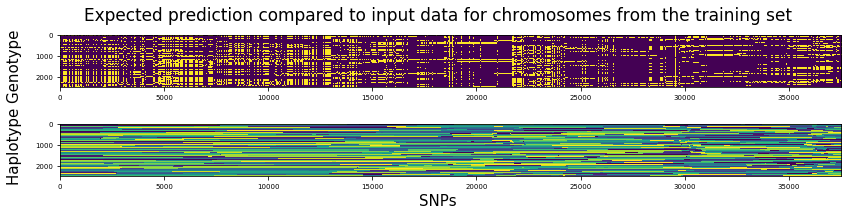

In [67]:
fig, (ax1,ax2) = plt.subplots(2,1,figsize=(14,3))
ax1.imshow(d_geno)
ax2.imshow(d_haplo)
fig.text(0.5, 0.06, 'SNPs', ha='center', va='center',fontsize=15)
fig.text(0.08, 0.5, 'Haplotype Genotype', ha='center', va='center', rotation='vertical',fontsize=15)
fig.text(0.5, 0.92, 'Expected prediction compared to input data for chromosomes from the training set', ha='center', va='center',fontsize=17)
plt.show()

### 1015 SNPs from ch. I

In [66]:
def recombine_linkage (parent_A,parent_B,linkage) :
    '''Recombines 2 parents' haplotypes at a random position chosen according to linkage'''
    r = choice(range(len(parent_A)),p=linkage)    # position of the recombination
    parent = rd.randint(0,1)
    child = np.copy([parent_A,parent_B][parent])
    child[r:] = [parent_A,parent_B][1-parent][r:]
    return child

def sample_parents (A) :
    '''Takes 2 parents among the individuals in a generation'''
    parent_A = rd.choice(A)
    parent_B = rd.choice(A)
    while (parent_B == parent_A).all() :
        parent_B = rd.choice(A)
    return parent_A,parent_B

def shuffle (A,G,N,p,linkage) :
    '''Recombines founders' haplotypes (p SNPs) for G generations with N individuals at each step.'''
    B=np.zeros((N,p),dtype=int)
    for k in range (N):
            (parent_A,parent_B)=sample_parents(A)                # First generation
            B[k] = recombine_linkage(parent_A,parent_B,linkage)
    A = np.copy(B)
    for g in range(1,G):
        for k in range (N):
            (parent_A,parent_B)=sample_parents(A)
            B[k] = recombine_linkage(parent_A,parent_B,linkage)
        np.copyto(A,B)
    return A

def reverse_SNPs (d_haplo,F_geno) :
    '''Converts an array of SNPs from haplotype to genotype.'''
    g = np.copy(d_haplo)
    for individual in g:
        #print (list(filter(lambda x: type(x)!=np.int64, individual)))
        for k in range (p):
            assert type(individual[k]-1)==np.int64, individual[k]
            individual[k]=F_geno[individual[k]-1][k]
    return g

In [67]:
def iterate_and_save (n,p,G,N,I,F_haplo,F_geno,linkage) :
    '''Simulates crossbreedings and saves the resulting genotypes (SNPs) + haplotypes in 2 binary files. '''
    haplo = np.zeros((n+N*I,p),dtype=int)
    haplo[:n] = F_haplo[:]
    geno = np.zeros((n+N*I,p),dtype=int)
    geno[:n] = F_geno[:]
    A = np.copy(F_haplo)
    for i in range (0,I):
        d_haplo = shuffle (A,G,N,p,linkage)
        haplo[n+i*N:n+(i+1)*N] = d_haplo                               # Add haplotypes of descentants (RILs)
        geno[n+i*N:n+(i+1)*N] = reverse_SNPs(d_haplo,F_geno)     # Add the conversion into genotypes
        if (i+1)//5==(i+1)/5 :
            print ("Iteration {0}/{1}".format(i+1,I))
    assert (F_haplo==np.array([[j for k in range(p)] for j in range(1,n+1)])).all(), F_haplo
    assert 0 not in d_haplo
    with open("Recombinations_haplotypes_n{0}_p{1}_G{2}_N{3}_I{4}.pkl".format(n,p,G,N,I),"wb") as handler:
        pickle.dump(haplo.tolist(),handler)   # Lists take much less space
    with open("Recombinations_genotypes_n{0}_p{1}_G{2}_N{3}_I{4}.pkl".format(n,p,G,N,I),"wb") as handler:
        pickle.dump(geno.tolist(),handler)

Résulting files :
   - Genotypes 1,0,1,0,1, ... ,1,0,1,0,0 =  
`[[[founder 1], ... , [founder 16]], [[[it 1 ind 1], ... ,[it 1 ind N]], ... ,[[it I ind 1], ... ,[it I ind N]]]`,
   - Haplotypes 3,3,3,12,12, ... ,1,1,1,1,1 =  
`[[[1,1,1,1,1,1], ... , [16,16,16,16,16,16]][[[1,1], ... ,[1,N]], ... ,[[I,1], ... ,[I,N]]]]`

In [68]:
p, n = np.shape(founders_ch1_1015)    # p = nb of SNPs (37525) / n = nb of founders (16)
G = 20    # nb of generations
N = 100   # number recombining individuals in a generation after sampling
I = 100   # nb of itérations

In [69]:
with open("Linkage_p{}.pkl".format(p),"rb") as handler:
    linkage = pickle.load(handler)

In [70]:
F_haplo = np.array([[j for i in range(p)] for j in range(1,n+1)])    # initial array (n founders and p SNPs)
F_geno = founders_ch1_1015.T
assert (reverse_SNPs (F_haplo,F_geno) == F_geno).all()
iterate_and_save (n,p,G,N,I,F_haplo,F_geno,linkage)

Iteration 5/100
Iteration 10/100
Iteration 15/100
Iteration 20/100
Iteration 25/100
Iteration 30/100
Iteration 35/100
Iteration 40/100
Iteration 45/100
Iteration 50/100
Iteration 55/100
Iteration 60/100
Iteration 65/100
Iteration 70/100
Iteration 75/100
Iteration 80/100
Iteration 85/100
Iteration 90/100
Iteration 95/100
Iteration 100/100


In [70]:
with open("Recombinations_haplotypes_n{0}_p{1}_G{2}_N{3}_I{4}.pkl".format(n,p,G,N,I),"rb") as handler:
    haplo = pickle.load(handler)
    F_haplo = np.array(haplo[:n])
    d_haplo = np.array(haplo[n:])

In [71]:
with open("Recombinations_genotypes_n{0}_p{1}_G{2}_N{3}_I{4}.pkl".format(n,p,G,N,I),"rb") as handler:
    geno = pickle.load(handler)
    F_geno = np.array(geno[:n])
    d_geno = np.array(geno[n:])

In [72]:
print(F_haplo.shape,d_haplo.shape,F_geno.shape,d_geno.shape)

(16, 1015) (10000, 1015) (16, 1015) (10000, 1015)


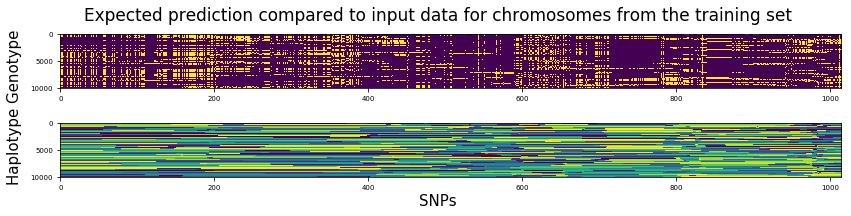

In [76]:
fig, (ax1,ax2) = plt.subplots(2,1,figsize=(14,3))
ax1.imshow(d_geno, aspect = 0.007)
ax2.imshow(d_haplo, aspect = 0.007)
fig.text(0.5, 0.06, 'SNPs', ha='center', va='center',fontsize=15)
fig.text(0.08, 0.5, 'Haplotype Genotype', ha='center', va='center', rotation='vertical',fontsize=15)
fig.text(0.5, 0.92, 'Expected prediction compared to input data for chromosomes from the training set', ha='center', va='center',fontsize=17)
plt.show()